In [ ]:
'''Linear Regression using Gradient Descent to optimise weight and bias. 
(Noiseless data without test split used since this project is only to visualise GD)'''

In [1]:
%matplotlib notebook
import numpy as np
from time import time as t
import matplotlib.pyplot as plt
from activationFunctions import *
np.random.seed(1)

In [2]:
activator = createScaledFunction(identity, 1e-2) # 1e-2*x (small constant multiplied to avoid numpy overflow)
@np.vectorize
def ErrorWith(w,b):
    ''' Calculates RMSE across training data, given weight and bias'''
    return np.sqrt(np.square(activator(w*trainX + b) - trainY).mean())

In [3]:
f = lambda x: (2*x-10) # Function to predict
trainX = np.linspace(-50,50,100).reshape(-1,1) #X train data
trainY = f(trainX) #Y train data

epochs = 10000
alpha = 1 #learning Rate

In [4]:
w = np.random.rand(1) # Initialise random weight
b = np.zeros(1) # Initialise bias with value 0
errors = [] # Error across epochs
weights = [] # Weight across epochs
biases = [] # Bias across epochs
startTime = t()
for epoch in range(epochs):
    z = w * trainX + b
    y = activator(z)
    E = np.square(y - trainY) # Find square error
    '''dE/dB = dE/dy * dy/dB = 2(y-trainY) * activatorPrime(z)'''
    yPrime = activator(z,True) # Passing true value asks activator to return derivative
    deltaB = 2 * (y - trainY) * yPrime
    '''dE/dW = dE/dy * dy/dW = 2(y-trainY) * activatorPrime(z) * trainX'''
    deltaW = deltaB * trainX
    b -= alpha * deltaB.mean()
    w -= alpha * deltaW.mean()
    
    error = ErrorWith(w,b)
    errors.append(error) # Record RMSE
    weights.append(w[0])
    biases.append(b[0])
    
print('RMSE:', error)
print('Time taken:', t() - startTime, 'seconds')
weights = np.array(weights)
biases = np.array(biases)
errors = np.array(errors)

RMSE: [1.35308215]
Time taken: 0.970339298248291 seconds


<IPython.core.display.Javascript object>


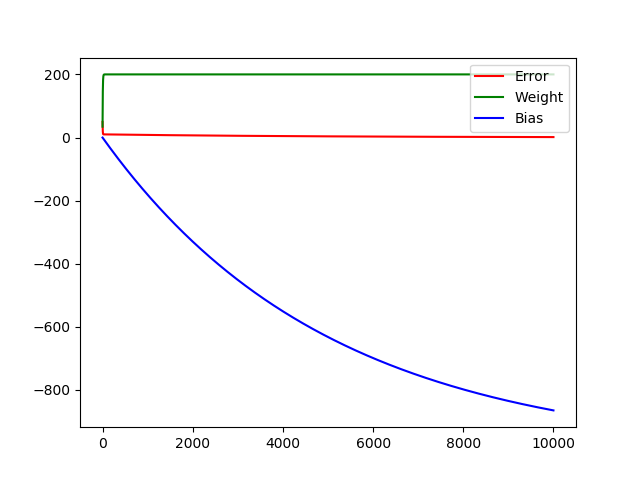

In [5]:
'''Plot RMSE, weight and bias across epochs''' 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(errors, c = 'r', label = 'Error')
ax1.plot(weights, c = 'g', label = 'Weight')
ax1.plot(biases, c = 'b', label = 'Bias')
plt.legend(loc="upper right")

<IPython.core.display.Javascript object>


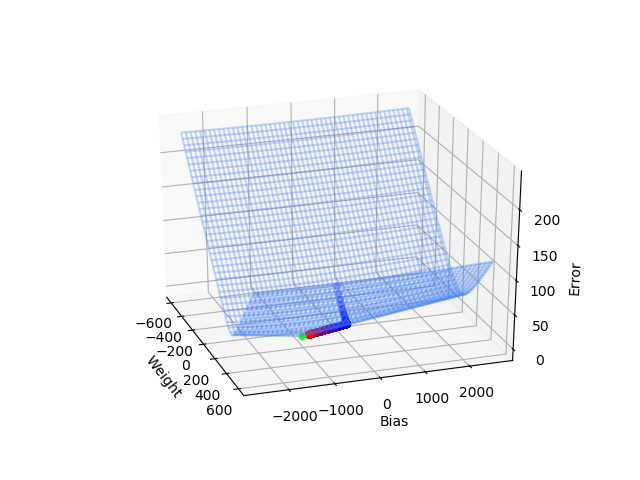

Text(0.5, 0, 'Error')

In [6]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcol
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection = '3d')

xMax = max(abs(min(weights)),abs(max(weights)))
yMax = max(abs(min(biases)),abs(max(biases)))
x = np.linspace(-xMax*3,xMax*3,100) # wide range of possible weight values
y = np.linspace(-yMax*3,yMax*3,100) # wide range of possible bias values

X,Y = np.meshgrid(x,y) # Makes pairs of values of W & B
Z = ErrorWith(X,Y) # Calculates error for each of those chosen parameters

'''Plot error along path chosen by Gradient Descent during training (blue to red)'''
cm1 = mcol.LinearSegmentedColormap.from_list("RB",["b","r"]) # Blue to Red colourmap
scatter = ax.scatter3D(weights, biases, errors, c = np.linspace(0, 1, epochs), cmap = cm1) # 3D path scatter

'''Plot error wireframe for a wide range of weights and biases'''
wireframe = ax.plot_wireframe(X, Y, Z, color = (0.25, 0.50, 0.95, 0.3)) # Plots expected error curve

'''Plot minimum error point in chosen range (Green dot)'''
minZ = Z.min() # Minimum Error
minX, minY = X[np.unravel_index(Z.argmin(),Z.shape)] , Y[np.unravel_index(Z.argmin(),Z.shape)] # W & B for which error is least
ax.scatter3D([minX], [minY], [minZ], color = (0.1,1,0.1)) # Predicted optimal parameters (Green Dot)

ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Error')
# Rotate the graph around to observe the convergence